In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 20,
    "font.size": 15,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
}

plt.rcParams.update(tex_fonts)


In [13]:
width = 540

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

### Load Data 

In [4]:
DATA_DIR ="/home/mak36/Desktop/curr_work/FLNCLAB/out/consolidated_data"

CIFAR_IID = os.path.join(DATA_DIR,'fedadap_iid_cifar_consolidated.csv')
CIFAR_NIID_0_1 = os.path.join(DATA_DIR,'fedadap_niid_0_1_cifar_consolidated.csv')
CIFAR_NIID_0_5 = os.path.join(DATA_DIR,'fedadap_niid_0_5_cifar_consolidated.csv')
CIFAR_NIID_100 = os.path.join(DATA_DIR,'fedadap_niid_100_cifar_consolidated.csv')

ABLATION_CIFAR = os.path.join(DATA_DIR,'fedadap_ablation.csv')

SHAKESPEARE = os.path.join(DATA_DIR,'fedadap_niid_shakespeare_consolidated.csv')

PLOTS_DIR = os.path.join(DATA_DIR,'plots')

### Cifar-10 IID data plots

#### IID

In [5]:
cifar_iid_consol = pd.read_csv(CIFAR_IID)
cifar_iid_consol.head()

,round,acc_fedavg,loss_fedavg,time_fedavg,acc_fedavg+fedadap,loss_fedavg+fedadap,time_fedavg+fedadap,acc_fedavgm,loss_fedavgm,time_fedavgm,acc_fedavgm+fedadap,loss_fedavgm+fedadap,time_fedavgm+fedadap,acc_fedex,loss_fedex,time_fedex
0,1,0.12,2.336008,55.949506,0.24,2.095887,56.223033,0.16,2.225036,56.412403,0.20,2.349637,56.613799,0.26,2.112944,45.074614
1,2,0.28,2.303176,54.617869,0.28,2.088169,54.393831,0.28,2.262860,54.737808,0.20,2.406500,55.352803,0.30,2.109736,43.170713
2,3,0.30,2.324433,54.603949,0.34,2.192472,52.704599,0.34,1.806757,54.628980,0.34,1.727830,53.879445,0.24,2.105229,42.971093
3,4,0.30,2.253442,53.739969,0.38,1.756968,52.247162,0.18,NaN,54.645528,0.30,2.421583,52.556525,0.30,2.057062,43.056720
4,5,0.42,2.068271,54.435070,0.32,1.662663,52.582837,0.36,1.688175,54.797372,0.58,1.374399,50.996799,0.36,2.022546,42.960847


/tmp/ipykernel_10486/366051215.py:51: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=2.0)


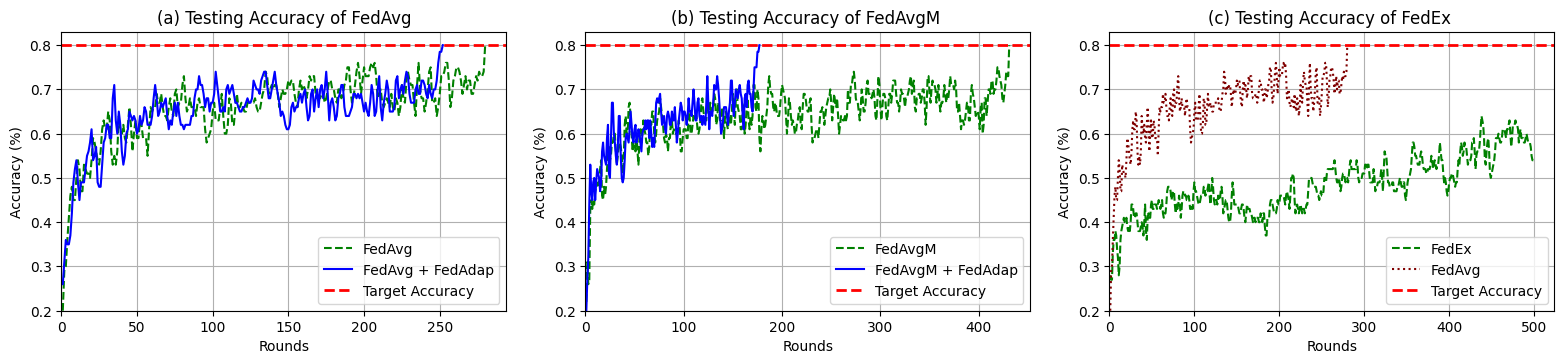

In [8]:
filename = 'fedadap_iid_performance'
window = 2
target_acc = 0.80

png_filename = filename+'.png'
pdf_filename = filename+'.pdf'
pgf_filename = filename+'.pgf'

dataframe = cifar_iid_consol
fig, ax = plt.subplots(1,3,figsize=(16,4),constrained_layout=True)
#fedavg plots start
ax[0].plot(dataframe['acc_fedavg'],window=window, color = 'g', label = 'FedAvg',linestyle='--')
ax[0].plot(dataframe['acc_fedavg+fedadap'],window=window, color = 'b', label = 'FedAvg + FedAdap',linestyle='solid')
ax[0].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[0].legend(loc = 'lower right')
ax[0].set_title('(a) Testing Accuracy of FedAvg')
ax[0].set_xlim(0,)
ax[0].set_ylim(0.20,)
ax[0].set_xlabel('Rounds')
ax[0].grid(True)
ax[0].set_ylabel('Accuracy (%)')

#fedavgm start
ax[1].plot(dataframe['acc_fedavgm'], color = 'g', label = 'FedAvgM',linestyle='--')
ax[1].plot(dataframe['acc_fedavgm+fedadap'], color = 'b', label = 'FedAvgM + FedAdap',linestyle='solid')
ax[1].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[1].legend(loc = 'lower right')
ax[1].set_title('(b) Testing Accuracy of FedAvgM ')
ax[1].grid(True)
ax[1].set_xlim(0,)
ax[1].set_ylim(0.20,)
ax[1].set_xlabel('Rounds')
ax[1].set_ylabel('Accuracy (%)')

#fedex start
ax[2].plot(dataframe['acc_fedex'], color = 'g', label = 'FedEx',linestyle='--')
ax[2].plot(dataframe['acc_fedavg'], color = 'maroon', label = 'FedAvg',linestyle='dotted')
ax[2].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[2].legend(loc = 'lower right')
ax[2].set_title('(c) Testing Accuracy of FedEx ')
ax[2].grid(True)
ax[2].set_xlim(0,)
ax[2].set_ylim(0.20,)
ax[2].set_xlabel('Rounds')
ax[2].set_ylabel('Accuracy (%)')

# fig.suptitle('Accuracy of Different Algorithms using Resnet-18 on CIFAR-10 IID data', fontsize=24)
# fig.savefig(os.path.join(PLOTS_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
# fig.savefig(os.path.join(PLOTS_DIR,png_filename),dpi= 300,bbox_inches='tight')
# fig.savefig(os.path.join(PLOTS_DIR,pdf_filename),dpi= 300,bbox_inches='tight')
fig.tight_layout(pad=2.0)

#### Non-IID

In [9]:
cifar_niid_100_consol = pd.read_csv(CIFAR_NIID_100)
cifar_niid_100_consol.head()

,round,acc_fedavg,loss_fedavg,time_fedavg,acc_fedavg+fedadap,loss_fedavg+fedadap,time_fedavg+fedadap,acc_fedavgm,loss_fedavgm,time_fedavgm,acc_fedavgm+fedadap,loss_fedavgm+fedadap,time_fedavgm+fedadap,acc_fedex,loss_fedex,time_fedex
0,1,0.11,2.941792,103.399305,0.30,2.007260,56.277649,0.26,2.248328,58.607479,0.32,2.128273,56.787929,0.12,2.566235,45.928925
1,2,0.18,2.368179,99.864988,0.24,2.247449,55.795612,0.10,2.712603,55.468248,0.24,2.537157,55.016035,0.20,2.300704,44.905924
2,3,0.38,1.854646,100.063954,0.32,2.207040,54.173747,0.34,1.977005,55.535309,0.44,1.922935,53.287410,0.22,2.191715,43.336503
3,4,0.45,1.432231,100.921466,0.38,1.882222,52.748427,0.18,NaN,54.642076,0.18,NaN,54.305571,0.34,2.030698,43.512776
4,5,0.47,1.363192,101.675606,0.46,1.602697,49.698540,0.54,1.493340,54.385356,0.12,inf,52.482362,0.28,1.963051,45.103173


In [10]:
cifar_niid_0_5_consol = pd.read_csv(CIFAR_NIID_0_5)
cifar_niid_0_5_consol.head()

,round,acc_fedavg,loss_fedavg,time_fedavg,acc_fedavg+fedadap,loss_fedavg+fedadap,time_fedavg+fedadap,acc_fedavgm,loss_fedavgm,time_fedavgm,acc_fedavgm+fedadap,loss_fedavgm+fedadap,time_fedavgm+fedadap,acc_fedex,loss_fedex,time_fedex
0,1,0.32,2.160792,59.242672,0.20,2.392746,59.076188,0.10,2.356650,64.093899,0.16,2.240885,57.872181,0.16,2.346423,41.327580
1,2,0.12,2.564664,56.906380,0.02,2.768073,59.917090,0.24,2.425610,60.774381,0.12,2.664062,59.778474,0.10,2.530661,51.042155
2,3,0.32,2.523255,57.099512,0.18,2.739450,59.456788,0.18,NaN,57.692426,0.18,inf,55.778111,0.20,2.419066,44.668250
3,4,0.18,2.544989,72.617919,0.18,2.667702,64.013947,0.18,NaN,57.229583,0.18,NaN,48.067109,0.20,2.248093,39.403047
4,5,0.22,2.425241,65.968613,0.30,2.441319,52.298377,0.20,2.398219,61.153134,0.42,2.316273,61.945556,0.22,2.168264,44.956662


In [11]:
cifar_niid_0_1_consol = pd.read_csv(CIFAR_NIID_0_1)
cifar_niid_0_1_consol.head()

,round,acc_fedavg,loss_fedavg,time_fedavg,acc_fedavg+fedadap,loss_fedavg+fedadap,time_fedavg+fedadap,acc_fedavgm,loss_fedavgm,time_fedavgm,acc_fedavgm+fedadap,loss_fedavgm+fedadap,time_fedavgm+fedadap,acc_fedex,loss_fedex,time_fedex
0,1,0.10,2.617208,55.163151,0.16,2.385623,47.253825,0.16,2.589184,66.566857,0.16,2.482423,52.523248,0.10,2.403333,88.070220
1,2,0.18,2.361228,88.427056,0.10,3.044112,73.967085,0.16,2.345059,81.192617,0.10,2.800298,84.915834,0.14,2.364335,77.197357
2,3,0.10,3.062004,88.137845,0.10,3.834730,85.343398,0.18,NaN,65.299646,0.18,NaN,90.160950,0.32,2.000440,85.577152
3,4,0.10,2.732148,74.271609,0.10,4.330920,53.556303,0.10,NaN,78.863060,0.18,NaN,66.213164,0.12,2.658404,80.307443
4,5,0.10,2.454416,74.399149,0.02,4.064401,48.450494,0.12,3.605394,85.163292,0.16,2.878104,59.274580,0.20,2.357204,80.699795


/tmp/ipykernel_10486/3590144781.py:118: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=2.0)


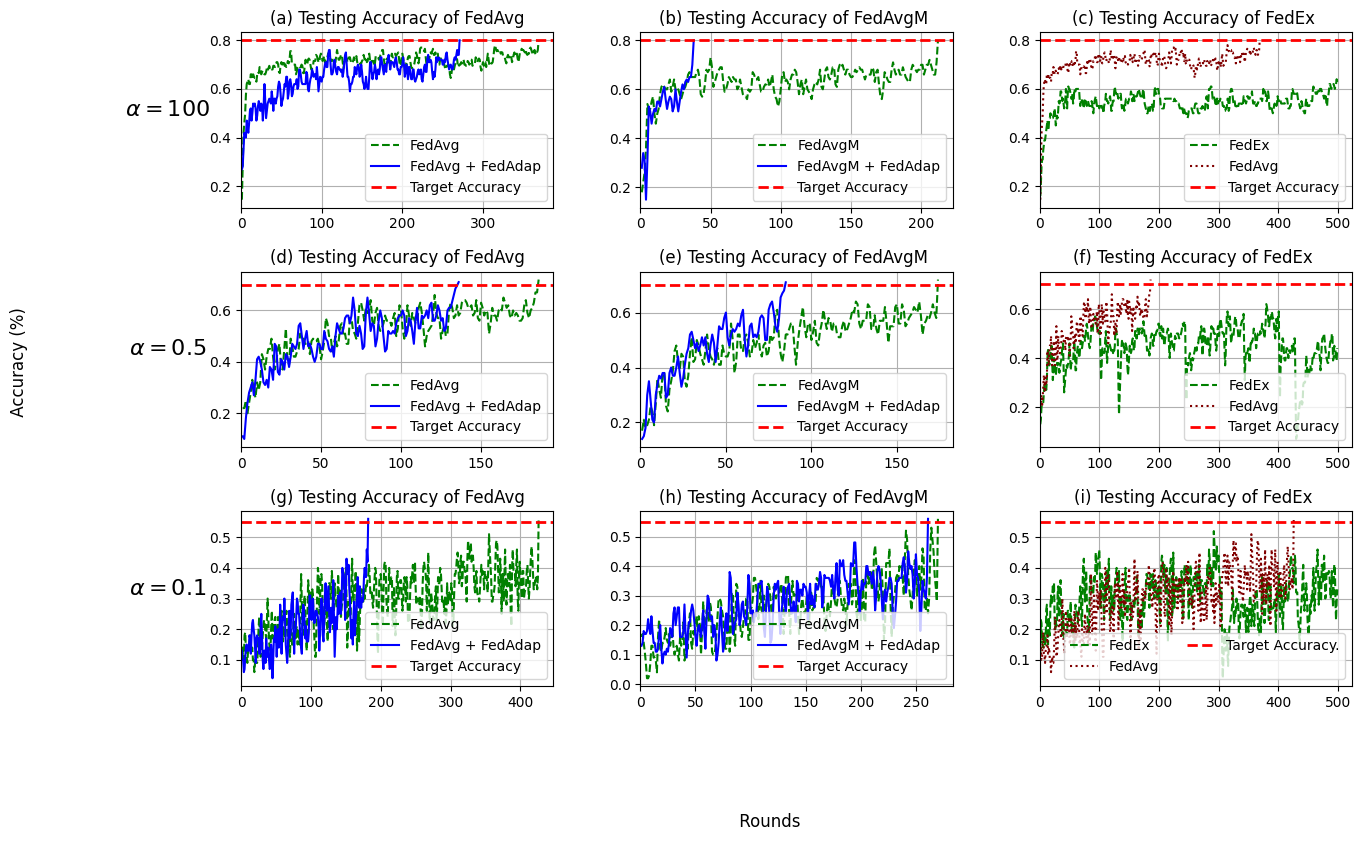

In [14]:
#non iid α = 100

filename = 'fedadap_niid_performance'
window = 2
target_acc = 0.80

png_filename = filename+'.png'
pdf_filename = filename+'.pdf'
pgf_filename = filename+'.pgf'

dataframe = cifar_niid_100_consol
fig, ax = plt.subplots(3,3,figsize=set_size(1100),constrained_layout=True)
#fedavg plots start
ax[0][0].plot(dataframe['acc_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax[0][0].plot(dataframe['acc_fedavg+fedadap'], color = 'b', label = 'FedAvg + FedAdap',linestyle='solid')
ax[0][0].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[0][0].legend(loc = 'lower right')
ax[0][0].set_title('(a) Testing Accuracy of FedAvg')
ax[0][0].set_xlim(0,)
ax[0][0].grid(True)
ax[0][0].set_ylabel(r'$ \alpha = 100$',rotation=0, fontsize=16, labelpad=30)

#fedavgm start
ax[0][1].plot(dataframe['acc_fedavgm'], color = 'g', label = 'FedAvgM',linestyle='--')
ax[0][1].plot(dataframe['acc_fedavgm+fedadap'], color = 'b', label = 'FedAvgM + FedAdap',linestyle='solid')
ax[0][1].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[0][1].legend(loc = 'lower right')
ax[0][1].set_title('(b) Testing Accuracy of FedAvgM ')
ax[0][1].grid(True)
ax[0][1].set_xlim(0,)
# ax[0][1].set_ylabel('Accuracy (%)')

#fedex start
ax[0][2].plot(dataframe['acc_fedex'], color = 'g', label = 'FedEx',linestyle='--')
ax[0][2].plot(dataframe['acc_fedavg'], color = 'maroon', label = 'FedAvg',linestyle='dotted')
ax[0][2].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[0][2].legend(loc = 'lower right')
ax[0][2].set_title('(c) Testing Accuracy of FedEx ')
ax[0][2].grid(True)
ax[0][2].set_xlim(0,)
# ax[0][2].set_ylabel('Accuracy (%)')

## non iid alpha 0.5
target_acc = 0.70
dataframe = cifar_niid_0_5_consol

#fedavg plots start
ax[1][0].plot(dataframe['acc_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax[1][0].plot(dataframe['acc_fedavg+fedadap'], color = 'b', label = 'FedAvg + FedAdap',linestyle='solid')
ax[1][0].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[1][0].legend(loc = 'lower right')
ax[1][0].set_title('(d) Testing Accuracy of FedAvg')
ax[1][0].grid(True)
ax[1][0].set_xlim(0,)
ax[1][0].set_ylabel(r'$ \alpha  = 0.5 $',rotation=0, fontsize=16, labelpad=30)

#fedavgm start
ax[1][1].plot(dataframe['acc_fedavgm'], color = 'g', label = 'FedAvgM',linestyle='--')
ax[1][1].plot(dataframe['acc_fedavgm+fedadap'], color = 'b', label = 'FedAvgM + FedAdap',linestyle='solid')
ax[1][1].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[1][1].legend(loc = 'lower right')
ax[1][1].set_title('(e) Testing Accuracy of FedAvgM ')
ax[1][1].grid(True)
ax[1][1].set_xlim(0,)
# ax[0][1].set_ylabel('Accuracy (%)')

#fedex start
ax[1][2].plot(dataframe['acc_fedex'], color = 'g', label = 'FedEx',linestyle='--')
ax[1][2].plot(dataframe['acc_fedavg'], color = 'maroon', label = 'FedAvg',linestyle='dotted')
ax[1][2].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[1][2].legend(loc = 'lower right')
ax[1][2].set_title('(f) Testing Accuracy of FedEx ')
ax[1][2].grid(True)
ax[1][2].set_xlim(0,)
# ax[0][2].set_ylabel('Accuracy (%)')

#non iid α = 0.1

target_acc = 0.55
dataframe = cifar_niid_0_1_consol

#fedavg plots start
ax[2][0].plot(dataframe['acc_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax[2][0].plot(dataframe['acc_fedavg+fedadap'], color = 'b', label = 'FedAvg + FedAdap',linestyle='solid')
ax[2][0].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[2][0].legend(loc = 'lower right')
ax[2][0].set_title('(g) Testing Accuracy of FedAvg')
ax[2][0].grid(True)
ax[2][0].set_xlim(0,)
ax[2][0].set_ylabel(r'$ \alpha  = 0.1 $',rotation=0, fontsize=16, labelpad=30)

#fedavgm start
ax[2][1].plot(dataframe['acc_fedavgm'], color = 'g', label = 'FedAvgM',linestyle='--')
ax[2][1].plot(dataframe['acc_fedavgm+fedadap'], color = 'b', label = 'FedAvgM + FedAdap',linestyle='solid')
ax[2][1].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[2][1].legend(loc = 'lower right')
ax[2][1].set_title('(h) Testing Accuracy of FedAvgM ')
ax[2][1].grid(True)
ax[2][1].set_xlim(0,)
# ax[0][1].set_ylabel('Accuracy (%)')

#fedex start
ax[2][2].plot(dataframe['acc_fedex'], color = 'g', label = 'FedEx',linestyle='--')
ax[2][2].plot(dataframe['acc_fedavg'], color = 'maroon', label = 'FedAvg',linestyle='dotted')
ax[2][2].axhline(y=target_acc,color='red',label= 'Target Accuracy.',linestyle="dashed",linewidth=2)
ax[2][2].legend(loc = 'lower right',ncol=2)
ax[2][2].set_title('(i) Testing Accuracy of FedEx ')
ax[2][2].grid(True)
ax[2][2].set_xlim(0,)
# ax[0][2].set_ylabel('Accuracy (%)')

# fig.suptitle('Accuracy of different algorithms using Resnet-18 on CIFAR-10 Non-IID data with Different values of '+ r'$\alpha$', fontsize=24)
fig.supylabel(' Accuracy (%)')
fig.supxlabel(' Rounds')
# fig.savefig(os.path.join(PLOTS_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
# fig.savefig(os.path.join(PLOTS_DIR,png_filename),dpi= 300,bbox_inches='tight')
# fig.savefig(os.path.join(PLOTS_DIR,pdf_filename),dpi= 300,bbox_inches='tight')
fig.tight_layout(pad=2.0)

### shakespeare data plots

In [15]:
shakespeare_consol = pd.read_csv(SHAKESPEARE)
shakespeare_consol.head()

,round,acc_fedavg,loss_fedavg,time_fedavg,acc_fedavg+fedadap,loss_fedavg+fedadap,time_fedavg+fedadap,acc_fedavgm,loss_fedavgm,time_fedavgm,acc_fedavgm+fedadap,loss_fedavgm+fedadap,time_fedavgm+fedadap,acc_fedex,loss_fedex,time_fedex
0,1,0.148305,3.273644,184.162190,0.191214,3.160881,136.440931,0.176849,3.096620,94.005242,0.195312,3.078784,141.155645,0.173077,3.271123,177.172123
1,2,0.148305,3.157207,305.603167,0.191214,3.051166,52.561465,0.176849,3.066880,237.281546,0.195312,3.071129,108.347500,0.173077,3.213060,200.740070
2,3,0.182203,3.020364,101.704199,0.191214,3.041367,124.115508,0.196141,2.939137,213.792312,0.195312,3.053555,128.044699,0.211538,2.931498,155.546478
3,4,0.233051,2.865490,137.631447,0.191214,3.035872,99.996308,0.266881,2.747105,637.303285,0.195312,3.049929,87.857743,0.307692,2.665616,161.709893
4,5,0.233051,2.697036,201.444005,0.191214,3.022766,64.207412,0.305466,2.552166,181.144526,0.195312,3.044248,65.929168,0.288462,2.623755,116.010610


/tmp/ipykernel_10486/1603382522.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=2.0)


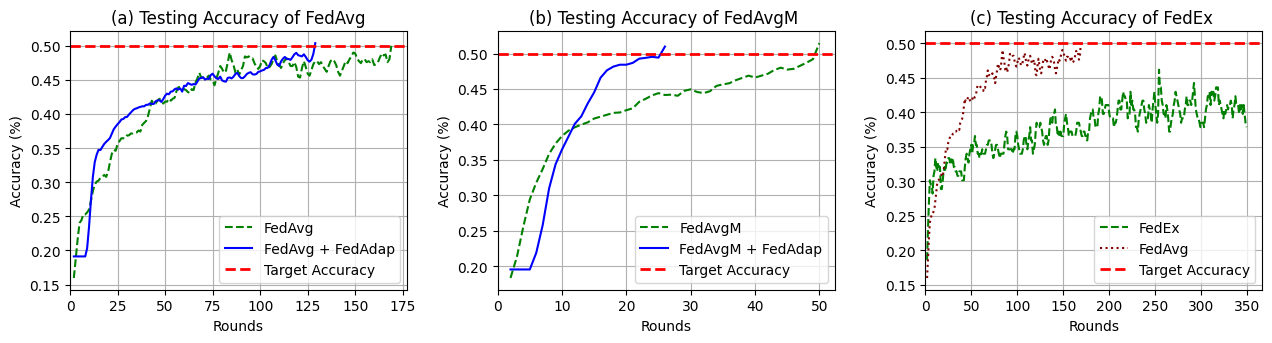

In [16]:
filename = 'shakespeare_niid_performance'
window = 3
target_acc = 0.50

png_filename = filename+'.png'
pdf_filename = filename+'.pdf'
pgf_filename = filename+'.pgf'

dataframe = shakespeare_consol
fig, ax = plt.subplots(1,3,figsize=(16,4),constrained_layout=True)
#fedavg plots start
ax[0].plot(dataframe['acc_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax[0].plot(dataframe['acc_fedavg+fedadap'], color = 'b', label = 'FedAvg + FedAdap',linestyle='solid')
ax[0].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[0].legend(loc = 'lower right')
ax[0].grid(True)
ax[0].set_xlim(0,)
ax[0].set_title('(a) Testing Accuracy of FedAvg')
ax[0].set_xlabel('Rounds')
ax[0].set_ylabel('Accuracy (%)')

#fedavgm start
ax[1].plot(dataframe['acc_fedavgm'], color = 'g', label = 'FedAvgM',linestyle='--')
ax[1].plot(dataframe['acc_fedavgm+fedadap'], color = 'b', label = 'FedAvgM + FedAdap',linestyle='solid')
ax[1].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[1].legend(loc = 'lower right')
ax[1].grid(True)
ax[1].set_xlim(0,)
ax[1].set_title('(b) Testing Accuracy of FedAvgM ')
ax[1].set_xlabel('Rounds')
ax[1].set_ylabel('Accuracy (%)')

#fedex start
ax[2].plot(dataframe['acc_fedex'], color = 'g', label = 'FedEx',linestyle='--')
ax[2].plot(dataframe['acc_fedavg'], color = 'maroon', label = 'FedAvg',linestyle='dotted')
ax[2].axhline(y=target_acc,color='red',label= 'Target Accuracy',linestyle="dashed",linewidth=2)
ax[2].legend(loc = 'lower right')
ax[2].grid(True)
ax[2].set_xlim(0,)
ax[2].set_title('(c) Testing Accuracy of FedEx ')
ax[2].set_xlabel('Rounds')
ax[2].set_ylabel('Accuracy (%)')

# fig.suptitle('Accuracy of different Algorithms with LSTM on Shakespeare data', fontsize=24)
# fig.savefig(os.path.join(PLOTS_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
# fig.savefig(os.path.join(PLOTS_DIR,png_filename),dpi= 300,bbox_inches='tight')
# fig.savefig(os.path.join(PLOTS_DIR,pdf_filename),dpi= 300,bbox_inches='tight')
fig.tight_layout(pad=2.0)